In [212]:
import numpy as np
import pandas as pd
import yahoofinancials as yf
from yahoofinancials import YahooFinancials
%matplotlib inline  
import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv('./temp_datalab_records_linkedin_company.csv')

In [214]:
comp_names = ['Apple', 'First Citizens Bank', 'Best Buy','Con Edison', 'IBM']
comp_symbols = ['AAPL', 'FCNCA', 'BBY','ED',  'IBM']
all_names = df['company_name'].unique()
df.tail(1200);

In [215]:
startdate = '2017-01-01'
enddate = '2018-07-01'
mask = (df['as_of_date'] >= startdate) & (df['as_of_date'] < enddate)
df = df.loc[mask]

stocks = YahooFinancials(comp_symbols)
stock_prices = stocks.get_historical_price_data(startdate, enddate, 'daily')

Text(0.5,1,'stock prices')

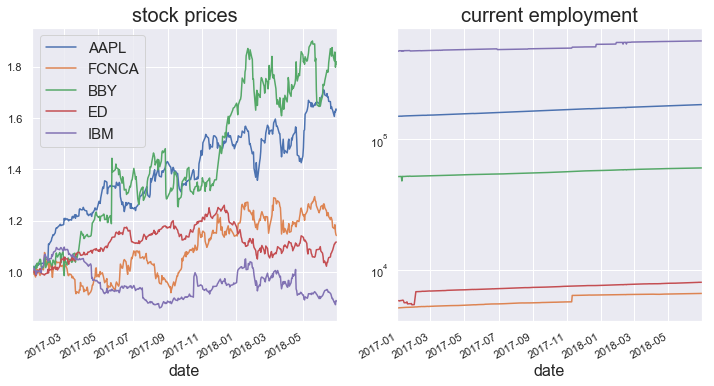

In [223]:
# Below, the left subplot shows the stock price and the right plot shows the number of 
# employees on LinkedIn.
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
for name, symb in zip(comp_names, comp_symbols):
    daily_prices = stock_prices[symb]['prices']
    daily_prices = pd.DataFrame.from_dict(daily_prices)
    mask_s = (daily_prices['formatted_date'] >= startdate) & (daily_prices['formatted_date'] < enddate)
    daily_prices=daily_prices.loc[mask_s]
    daily_prices['adjclose'] = daily_prices['adjclose'].div(daily_prices['adjclose'].iloc[0])
    
    daily_prices['formatted_date'] = pd.to_datetime(daily_prices['formatted_date'])
    daily_prices = daily_prices.set_index('formatted_date')
    daily_prices['adjclose'].plot(label=symb, ax=ax1)

    #employment data
    df_i = df.loc[df['company_name']==name]
    df_i = df_i[['as_of_date','employees_on_platform']]
    df_i['as_of_date'] = pd.to_datetime(df_i['as_of_date'])
    df_i = df_i.set_index('as_of_date')
    df_i['employees_on_platform'].plot(label=name, ax=ax2)
    
    
ax1.legend(fontsize = 15)
#ax2.legend()
ax2.set_yscale('log')
ax2.set_xlabel('date', fontsize=16)
ax2.set_title('current employment', fontsize=20)
ax1.set_xlabel('date', fontsize=16)
ax1.set_title('stock prices', fontsize=20)

Apple 0.0004294322190116334 0.0014355575986656828 545 376
First Citizens Bank 0.0006411605251675675 0.0008663266714725762 542 376
Best Buy 0.0003280366837883447 0.002323624207814413 541 376
Con Edison 0.0005278402463757603 0.00015571755550425443 542 376
IBM 0.0004121921439067478 -0.00024184481590247239 542 376


Text(0.5,1,'Slopes of the scaled stock price and employment for five companies')

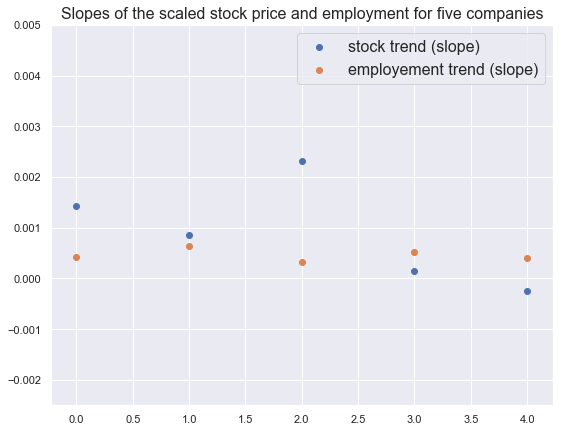

In [227]:
'''
  The plot Below shows the trend (slope) of the companies in the 'comp_names' list, 
above. More analysis and re-normalization of values is needed as the employment number 
and stock price are in different unit. In these 5 companies we dont see much change in 
the employment, most likely is because of the size of the company, i.e. there is no major 
changes (percentage-wise) over a period of a year. The stock prices have more variability, 
as expected. Interestingly at the last point (IBM employment and stock), even though 
employment has gone up, stock price has downward trend. '''

slope_stock =[]
slope_employ = []
for name, symb in zip(comp_names, comp_symbols):
    
    df_i = df.loc[df['company_name']==name]
    df_i = df_i[['as_of_date','employees_on_platform']]
    df_i['employees_on_platform'] = df_i['employees_on_platform'].div(
                                    df_i['employees_on_platform'].iloc[0])

    #print df_i.shape[0], df_i['as_of_date'].min(), df_i['as_of_date'].max()
    #print 'e--max! ', df_i['employees_on_platform'].max()

    xarr1 = range(0,df_i.shape[0],1)
    p1_employ = np.polyfit(xarr1, df_i['employees_on_platform'], 1)
    
    daily_prices = stock_prices[symb]['prices']
    daily_prices = pd.DataFrame.from_dict(daily_prices)
    mask_s = (daily_prices['formatted_date'] >= startdate) & (daily_prices['formatted_date'] < enddate)
    daily_prices=daily_prices.loc[mask_s]
    daily_prices['adjclose'] = daily_prices['adjclose'].div(daily_prices['adjclose'].iloc[0])
    
    #print daily_prices.shape[0], daily_prices['formatted_date'].isnull().sum(), daily_prices['adjclose'].isnull().sum()
    #print 's--max! ', daily_prices['formatted_date'].max(), daily_prices['formatted_date'].min()
    
    xarr2 = range(0,daily_prices.shape[0],1)
    p1_stock = np.polyfit(xarr2, daily_prices['adjclose'], 1)
    print name, p1_employ[0], p1_stock[0], len(xarr1), len(xarr2)
    slope_stock.append(p1_stock[0])
    slope_employ.append(p1_employ[0])
    
fig, ax = plt.subplots(figsize=(9, 7))

xarr = range(0, len(comp_names))
ax.scatter(xarr, slope_stock, label = 'stock trend (slope)', marker='o')
ax.scatter(xarr, slope_employ, label='employement trend (slope)', marker='o')
ax.set_ylim([-0.0025, .005])
ax.legend(fontsize=16)
ax.set_title('Slopes of the scaled stock price and employment for five companies', fontsize=16)
#plt.show()

